In [1]:
import os
import os.path
import sys
d = os.path.join(os.getcwd())
print(d)
sys.path.append(d)
# sys.path

C:\Users\Zachary\Documents\GitHub\COMP 3201 - TSP Evolutionary Algorithm


In [2]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure as Figure
import seaborn as sns
import Other.Colours as CP
import numpy as np
import pandas as pd
import math

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# https://pandas.pydata.org/pandas-docs/stable/visualization.html
# http://pandas.pydata.org/pandas-docs/version/0.13/visualization.html
# https://matplotlib.org/users/pyplot_tutorial.html

ModuleNotFoundError: No module named 'Other'

Using style 'ggplot'


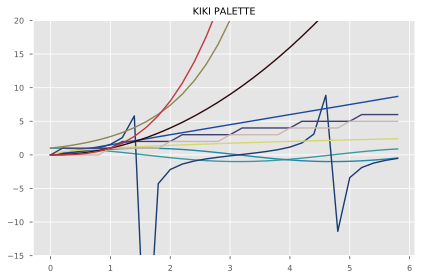

In [10]:
def palette_test(colour):
    t = [t/5.0 for t in range(30)]
    fig = Figure(figsize=(12.0, 15.0), dpi=100) 
    canvas = FigureCanvas(fig)
    direc = '../src/Other/PaletteOutput/'

    functions = [math.cos, math.sin, math.tan, lambda x: 1.5*x, 
                 math.exp, math.sqrt, math.ceil,
                 math.floor, lambda x: x**2, lambda x: x**3]

    for index, fn in enumerate(functions):
        palette = colour+"_"+str(index)
        ax = fig.add_subplot(5, 2, index+1)
        ax.set_title(palette)
        f = [fn(x) for x in t]
        ax.plot(t, f, color=getattr(CP, palette), markersize=5.0) 

    fig.tight_layout()
    fig.savefig(direc + colour + '_PALETTE.svg')
    
    plt.title(colour + ' PALETTE')
    for index, fn in enumerate(functions):
        palette = colour+"_"+str(index)
        f = [fn(x) for x in t]
        plt.plot(t, f, color=getattr(CP, palette))

    plt.ylim(-15, 20)  # limits the y-axis
    plt.tight_layout()
    plt.savefig(direc + colour + '_OVERLAY.svg')

# Set up the style of the graphs, and display a sample graph
graph_style = 5
plt.style.use(plt.style.available[graph_style])  # 5, 14, 22
sns.set_context("paper")
print("Using style '{}'".format(plt.style.available[graph_style]))
palettes = ["KIKI"]
for x in palettes: 
    palette_test(x)

In [11]:
# Changing this variable changes which file to parse.
# Makes testing/presenting easier, since less code has to be changed.
FILENUM = 1

In [23]:
from random import shuffle

from EA_Methods import ParentSelectionMethods as ParentSelectionMethods
from EA_Methods import RecombinationMethods as RecombinationMethods
from EA_Methods import MutationMethods as MutationMethods
from EA_Methods import SurvivorSelectionMethods as SurvivorSelectionMethods
from EA_Methods.ParentSelectionMethods import tournament as PSM
from EA_Methods.RecombinationMethods import recombination_cut_crossover as RM
from EA_Methods.MutationMethods import permutation_swap as MM
from EA_Methods.SurvivorSelectionMethods import replacement as SSM
from Setups.TSP.TSP import read_tsp_file as parse_file
from Setups.TSP.TSP import random_initialization as initialize
from Setups.TSP.TSP import euclidean_distance as eval_fitness
from Setups.TSP import TSP as TSP



# Global Variable Initialization
genome_length       =      parse_file(FILENUM)
generation_limit    =      100
population_size     =      60
mating_pool_size    =      population_size//2 if (population_size//2) % 2 == 0 else (population_size//2)+1  # has to be even

tournament_size     =      population_size//10
crossover_rate      =      0.9
crossover_point     =      genome_length//3
mutation_rate       =      0.2


# Setting key variables in other modules
ParentSelectionMethods.set_tournament_size(tournament_size)
RecombinationMethods.set_crossover_point(crossover_point)
RecombinationMethods.set_crossover_rate(crossover_rate)
MutationMethods.set_mutation_rate(mutation_rate)

In [20]:
def evolution_algorithm(maximize, print_gens=True, display_freq=None):
    if display_freq is None: display_freq = generation_limit
    
    # Modular function declarations
    op = max if maximize else min
    
    # Setting 'best' in other modules
    ParentSelectionMethods.set_op(op)
    SurvivorSelectionMethods.set_op(op)

    # Initialize Population
    population = initialize(population_size, genome_length)
    fitness = [eval_fitness(i) for i in population]
    
    if print_gens:
        # TODO - Better handle demonstration output.
        print("Locations of the cities:")
        TSP.point_display()

    # Evolution starts
    for generation in range(generation_limit):

        # Generation Info
        if print_gens and (generation % display_freq == display_freq - 1):
            # TODO - Better handle demonstration output.
            op_fit = op(fitness)
            optimal_solutions = [i + 1 for i in range(population_size) if fitness[i] == op_fit]
            TSP.path_display(optimal_solutions[0])
            print("Generation: {}\n - Best fitness: {}\n - Avg. fitness: {}\n - Number of optimal solutions: {}/{}\n".format(
                generation+1, op(fitness), sum(fitness)/len(fitness), len(optimal_solutions), population_size)
            )

        # Parent Selection
        parents_index = PSM(fitness, mating_pool_size)

        # Recombination
        offspring = RM(population, parents_index)

        # Mutations Selection
        offspring = [MM(i) for i in offspring]
        offspring_fitness = [eval_fitness(i) for i in offspring]

        # Survivor Selection
        population, fitness = SSM(population, fitness, offspring, offspring_fitness)
    # Evolution ends
        
    # Final Fitness Info
    op_fit = op(fitness)
    optimal_solutions = [i + 1 for i in range(population_size) if fitness[i] == op_fit]
    print("\nBest solution fitness:", op_fit, "\nNumber of optimal solutions: ", len(optimal_solutions), '/', population_size)
    print("Best solution indexes:\n", optimal_solutions)

Displaying graph every 10 generations.


Generation: 10
 - Best fitness: 59226.69577535552
 - Avg. fitness: 64857.72503504135
Number of optimal solutions: 1/60
Generation: 20
 - Best fitness: 56333.02054904265
 - Avg. fitness: 59245.37993362704
Number of optimal solutions: 1/60
Generation: 30
 - Best fitness: 52668.13332983694
 - Avg. fitness: 53191.068752764106
Number of optimal solutions: 58/60
Generation: 40
 - Best fitness: 50159.72617415601
 - Avg. fitness: 51663.1906527067
Number of optimal solutions: 15/60
Generation: 50
 - Best fitness: 48569.24578099854
 - Avg. fitness: 48876.83697425397
Number of optimal solutions: 6/60
Generation: 60
 - Best fitness: 47379.94338971396
 - Avg. fitness: 49475.61340660197
Number of optimal solutions: 1/60
Generation: 70
 - Best fitness: 45012.18615620187
 - Avg. fitness: 47417.72554350214
Number of optimal solutions: 3/60
Generation: 80
 - Best fitness: 44683.639849459345
 - Avg. fitness: 45559.51312870395
Number of optimal solutions: 55/60
Gen

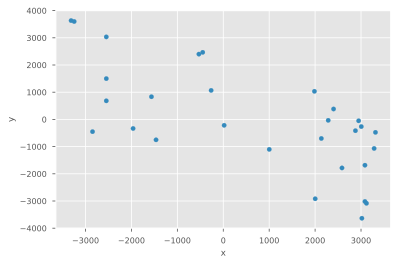

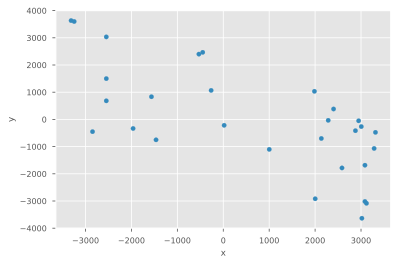

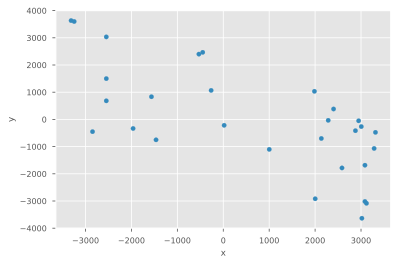

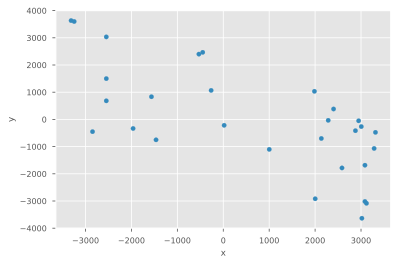

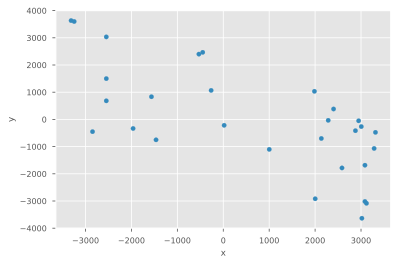

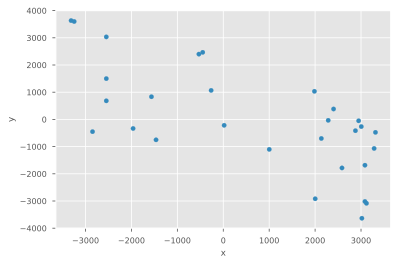

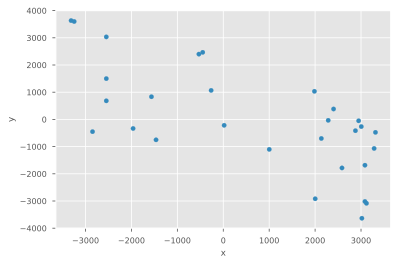

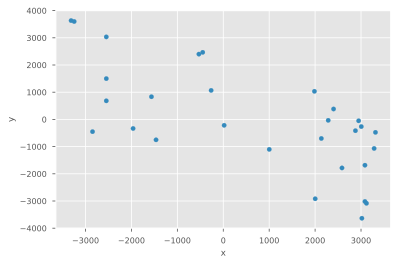

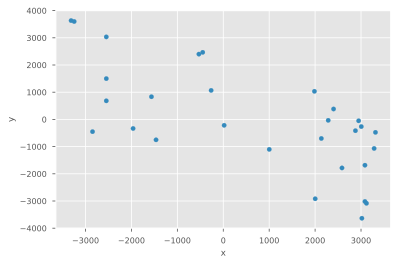

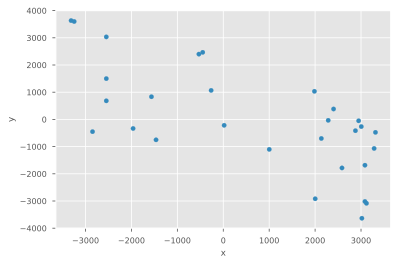

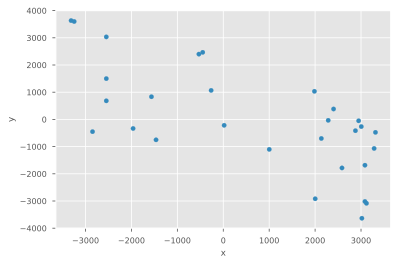

In [21]:
freq = min(int(generation_limit * 0.1), 50)
print('\n\nDisplaying information every {} generations.\n\n'.format(freq))
evolution_algorithm(False, True, freq)